In [79]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [80]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


notice that "TotalCharges" is object, so it may have nan values

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [82]:
df.shape

(7043, 21)

## Clean up the data

In [83]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [84]:
# one-hot encoding:
# categorical variables are converted into a form that could be provided to ML algorithms

columns = list(df)
catg_obj =[]
for attr in columns:
    if df[attr].dtype =='object':
        if attr != 'customerID':
            catg_obj.append(attr)

df = pd.get_dummies(df, columns = catg_obj, drop_first=True)
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


drop 'customerID' column

In [85]:
df.columns
df.drop(['customerID'], axis = 1, inplace = True)

drop nans

In [86]:
df.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [87]:
df.dropna(inplace=True)
df.shape # drop 11 rows that has nan values

(7032, 31)

In [88]:
# df.info()

## Train Test split

In [89]:
from sklearn.model_selection import train_test_split

x = df.loc[:, df.columns != 'Churn_Yes']
y = df['Churn_Yes']
x_train, x_test, y_train, y_test = train_test_split(x, y) # default test_size = 0.25

See if data is balance or not 

In [90]:
sum_1 = sum(y_train==1)
sum_0 = sum(y_train==0)
print sum_1
print sum_0
print (sum_1/float(sum_0+sum_1)) # Percentage churn 

1415
3859
0.268297307546


### Use SMOTE Oversampling to balance data

In [91]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()
x_train_, y_train_ = smo.fit_resample(x_train, y_train.ravel())

## Fitting multiple models using KFold

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scoring = 'accuracy'
models = []
models.append(('LogR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
rslts = []
names = []
for name, model in models:
    kf = KFold(n_splits=10, random_state=None)
    scores = cross_val_score(model, x_train_, y_train_, cv=kf, scoring=scoring)
    rslts.append(scores)
    names.append(name)
    print"%s: %f" % (name, scores.mean())

LogR: 0.749289
DT: 0.807634
RF: 0.845593


## Random Forest

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train_, y_train_)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.779294653015


### Random Forest Confusion Matrix

In [94]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1153  151]
 [ 237  217]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1304
           1       0.59      0.48      0.53       454

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



### Random Forest ROC Curve

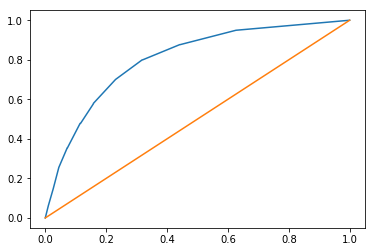

In [95]:
from sklearn import metrics

rf_pre_prob = rf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_pre_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.savefig("RF_ROC")

## Logistic Regression

In [96]:
lr = LogisticRegression()
lr.fit(x_train_, y_train_)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.766211604096


### Logistic Regression Confusion Matrix

In [97]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[977 327]
 [ 84 370]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1304
           1       0.53      0.81      0.64       454

   micro avg       0.77      0.77      0.77      1758
   macro avg       0.73      0.78      0.73      1758
weighted avg       0.82      0.77      0.78      1758



### Logistic Regression ROC Curve

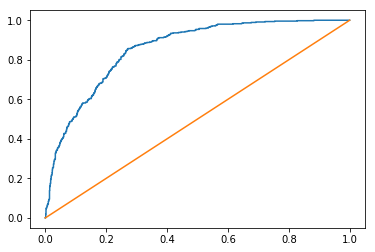

In [98]:
lr_pre_prob = lr.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pre_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.savefig("LR_ROC")

## Using Cross validation to get a validation score

In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x_train_, y_train_, cv = 5)
print("Cross Validation Scores: " + str(scores))
print("Mean Cross Validation Score: " + str(scores.mean()))

Cross Validation Scores: [ 0.65544041  0.71567358  0.92940415  0.9242228   0.91763943]
Mean Cross Validation Score: 0.828476072391


## Feature importances with forests of trees

In [100]:
features = x_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

feature_importances = pd.DataFrame(importances,index = features,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
TotalCharges,0.116805
tenure,0.111848
MonthlyCharges,0.101589
PaymentMethod_Electronic check,0.093270
Contract_Two year,0.076361
PaperlessBilling_Yes,0.043977
OnlineSecurity_Yes,0.042574
TechSupport_Yes,0.041188
Partner_Yes,0.039395
Contract_One year,0.038659


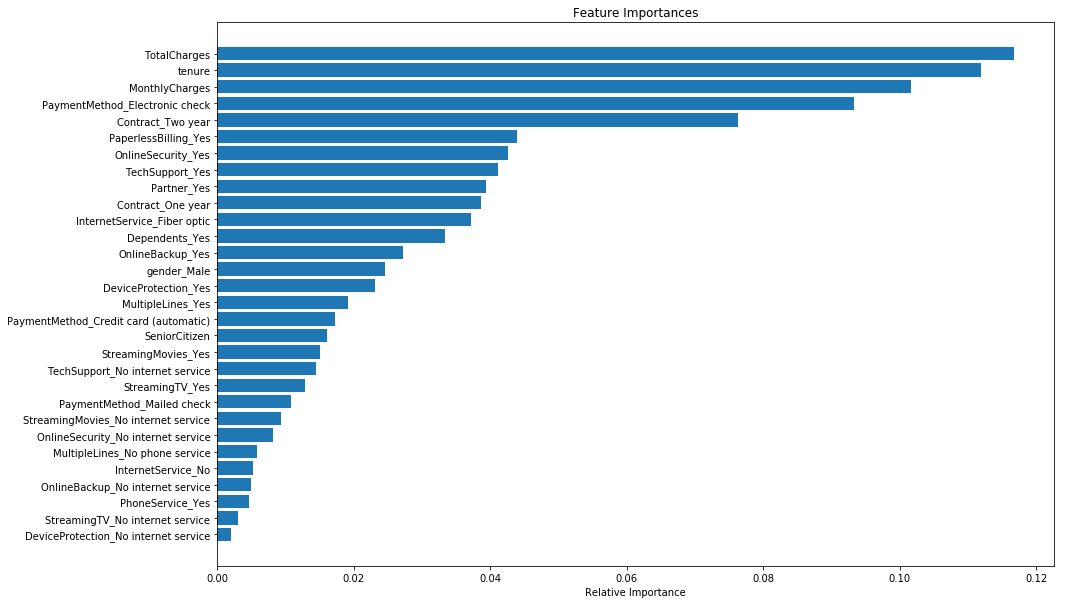

In [101]:
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig("Feature Importances", dpi=150)
plt.show()

#### Top two features are TotalCharges and Tenures

In [102]:
df.groupby(['Churn_Yes']).TotalCharges.describe()

,count,mean,std,min,25%,50%,75%,max
Churn_Yes,,,,,,,,
0,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


In [103]:
df.groupby(['Churn_Yes']).tenure.describe()

,count,mean,std,min,25%,50%,75%,max
Churn_Yes,,,,,,,,
0,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [104]:
num = ['float64', 'int64']
num_data = df.select_dtypes(include=num)
cat_data = df.select_dtypes(exclude=num)

In [105]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


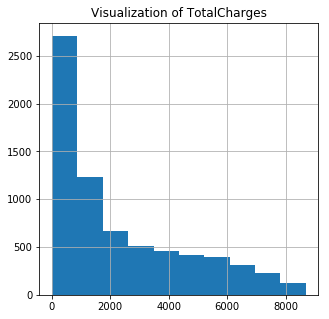

In [106]:
df["TotalCharges"].hist(figsize=(5,5))
plt.title('Visualization of TotalCharges')
plt.plot
plt.savefig("TotalCharges", dpi=300)

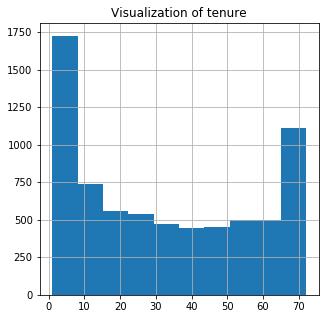

In [107]:
df["tenure"].hist(figsize=(5,5))
plt.title('Visualization of tenure')
plt.plot
plt.savefig("tenure", dpi=300)